# Coffee Reviews and Recommendations Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('seaborn')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Coffee_Data_CoffeeReview\coffee_fix.csv")
df.head(3)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/sweety-esp...,\n\n\n95\n\n\nA.R.C.\n“Sweety” Espresso Blend...,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,https://www.coffeereview.com/review/flora-blen...,\n\n\n94\n\n\nA.R.C.\nFlora Blend Espresso\n\...,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,https://www.coffeereview.com/review/ethiopia-s...,\n\n\n92\n\n\nRevel Coffee\nEthiopia Shakiso ...,92,Revel Coffee,Ethiopia Shakiso Mormora,"Billings, Montana","Guji Zone, southern Ethiopia",Medium-Light,$16.00/12 ounces,November 2017,54/70,9.0,8.0,8.0,9.0,8.0,NaN,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."


### Statistical representation of Data

In [3]:
df.shape

(2282, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
slug           2282 non-null object
all_text       2282 non-null object
rating         2282 non-null int64
roaster        2282 non-null object
name           2282 non-null object
location       2281 non-null object
origin         2282 non-null object
roast          2229 non-null object
est_price      2277 non-null object
review_date    2282 non-null object
agtron         2282 non-null object
aroma          2255 non-null float64
acid           1947 non-null float64
body           2279 non-null float64
flavor         2279 non-null float64
aftertaste     2279 non-null float64
with_milk      356 non-null float64
desc_1         2282 non-null object
desc_2         2282 non-null object
desc_3         2280 non-null object
dtypes: float64(6), int64(1), object(13)
memory usage: 356.7+ KB


In [5]:
round(df.describe(), 2)

,rating,aroma,acid,body,flavor,aftertaste,with_milk
count,2282.00,2255.00,1947.00,2279.00,2279.00,2279.00,356.00
mean,92.97,8.81,8.48,8.59,8.94,8.09,8.83
std,2.04,0.49,0.64,0.53,0.45,0.56,0.52
min,63.00,2.00,1.00,5.00,2.00,2.00,5.00
25%,92.00,9.00,8.00,8.00,9.00,8.00,9.00
50%,93.00,9.00,9.00,9.00,9.00,8.00,9.00
75%,94.00,9.00,9.00,9.00,9.00,8.00,9.00
max,98.00,10.00,10.00,10.00,10.00,10.00,10.00


In [6]:
df.isnull().sum()

slug              0
all_text          0
rating            0
roaster           0
name              0
location          1
origin            0
roast            53
est_price         5
review_date       0
agtron            0
aroma            27
acid            335
body              3
flavor            3
aftertaste        3
with_milk      1926
desc_1            0
desc_2            0
desc_3            2
dtype: int64

Text(0.5, 1.0, 'Missing Values in the Dataset (Nan Vals)\n')

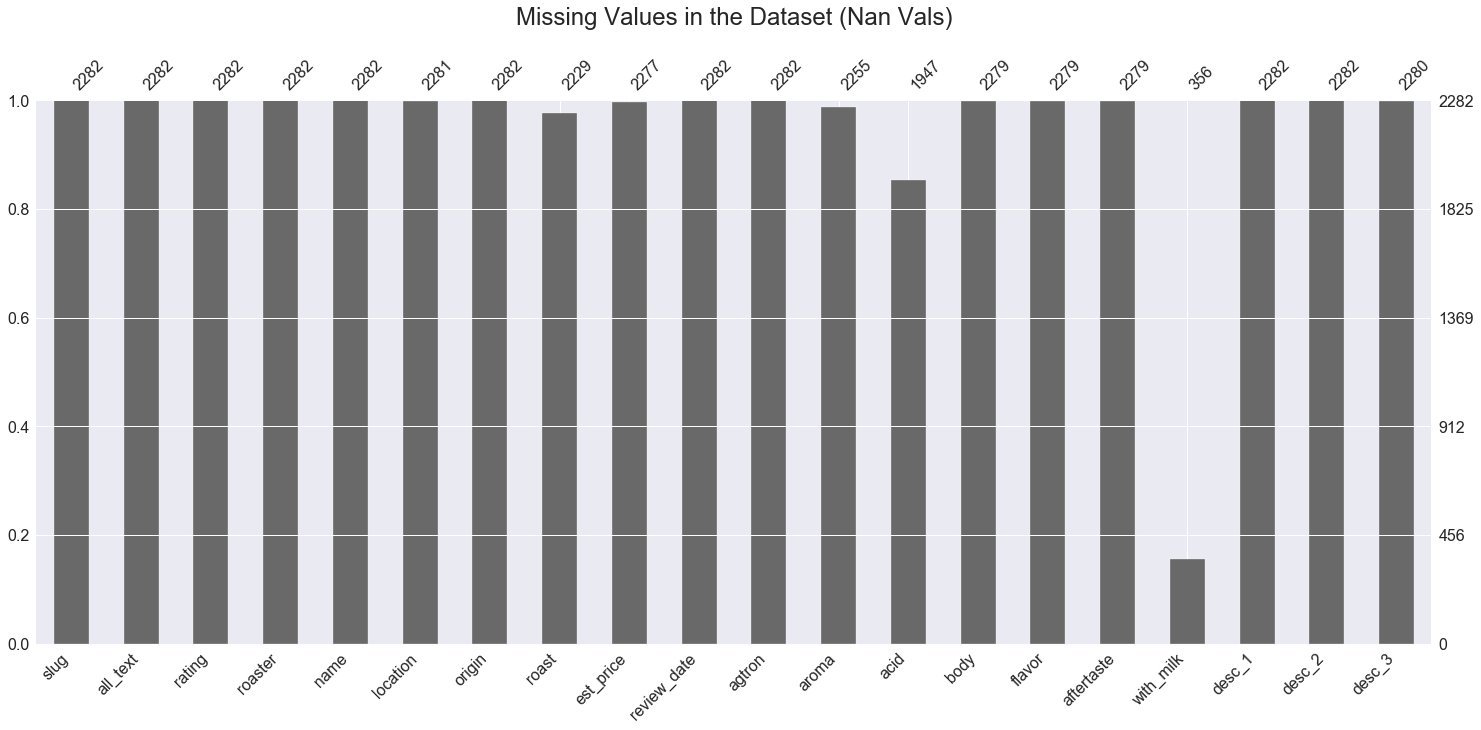

In [7]:
msno.bar(df)
plt.title('Missing Values in the Dataset (Nan Vals)\n', fontdict = {'size':24})

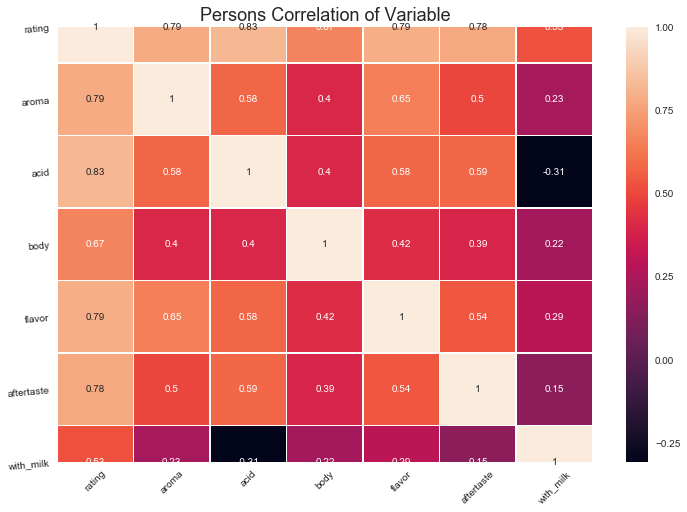

In [8]:
plt.figure(figsize = (12,8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 5)
plt.title('Persons Correlation of Variable', fontdict={'size':18})
plt.rcParams.update()

In [9]:
df.corr().style.background_gradient('Greens')

,rating,aroma,acid,body,flavor,aftertaste,with_milk
rating,1,0.785475,0.825465,0.667216,0.792177,0.778599,0.52821
aroma,0.785475,1,0.579804,0.403751,0.650578,0.499831,0.23354
acid,0.825465,0.579804,1,0.402615,0.57662,0.585379,-0.305888
body,0.667216,0.403751,0.402615,1,0.420409,0.393995,0.223331
flavor,0.792177,0.650578,0.57662,0.420409,1,0.536501,0.293096
aftertaste,0.778599,0.499831,0.585379,0.393995,0.536501,1,0.15364
with_milk,0.52821,0.23354,-0.305888,0.223331,0.293096,0.15364,1


In [10]:
df.head(2)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/sweety-esp...,\n\n\n95\n\n\nA.R.C.\n“Sweety” Espresso Blend...,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,https://www.coffeereview.com/review/flora-blen...,\n\n\n94\n\n\nA.R.C.\nFlora Blend Espresso\n\...,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."


Text(0.5, 1.0, 'Distirbution plot for the Ratings variable')

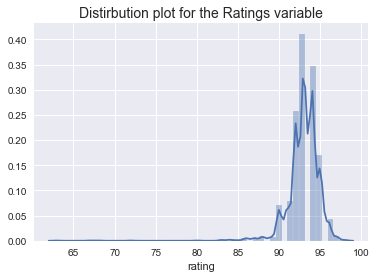

In [11]:
sb.distplot(df['rating'])
plt.title('Distirbution plot for the Ratings variable', fontdict = {'size': 14})

Text(0.5, 1.0, 'Distirbution plot for the Aroma variable')

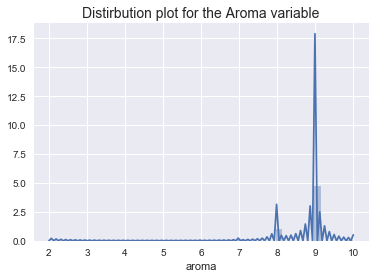

In [12]:
sb.distplot(df['aroma'])
plt.title('Distirbution plot for the Aroma variable', fontdict = {'size': 14})

Text(0.5, 1.0, 'Distirbution plot for the Flavor variable')

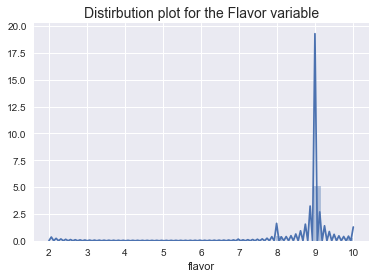

In [13]:
sb.distplot(df['flavor'])
plt.title('Distirbution plot for the Flavor variable', fontdict = {'size': 14})

Text(0.5, 1.0, 'Distirbution plot for the After Taste variable')

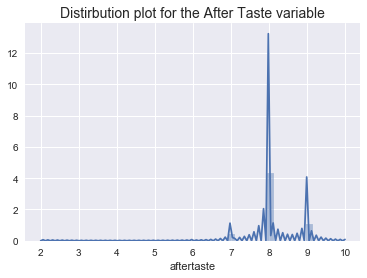

In [14]:
sb.distplot(df['aftertaste'])
plt.title('Distirbution plot for the After Taste variable', fontdict = {'size': 14})

In [15]:
df.head(2)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/sweety-esp...,\n\n\n95\n\n\nA.R.C.\n“Sweety” Espresso Blend...,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,https://www.coffeereview.com/review/flora-blen...,\n\n\n94\n\n\nA.R.C.\nFlora Blend Espresso\n\...,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."


Text(0.5, 1.0, 'Top 10 Roaster in the coffee Industry')

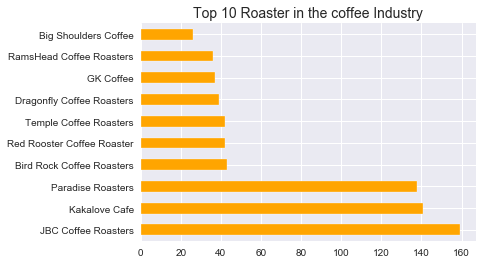

In [16]:
df['roaster'].value_counts().head(10).plot(kind = 'barh', color = '#FFA500')
plt.title('Top 10 Roaster in the coffee Industry', fontdict = {'size':14})

Text(0.5, 1.0, '20 most common coffee ')

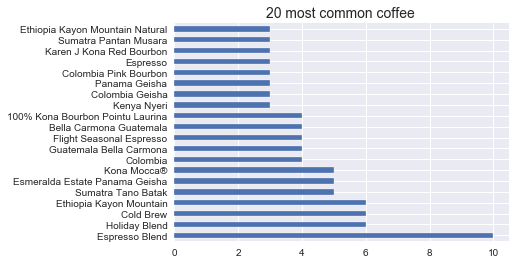

In [17]:
df['name'].value_counts().head(20).plot(kind = 'barh')
plt.title('20 most common coffee ', fontdict = {'size':14})

Text(0.5, 1.0, 'Coffee markets across cities ranked')

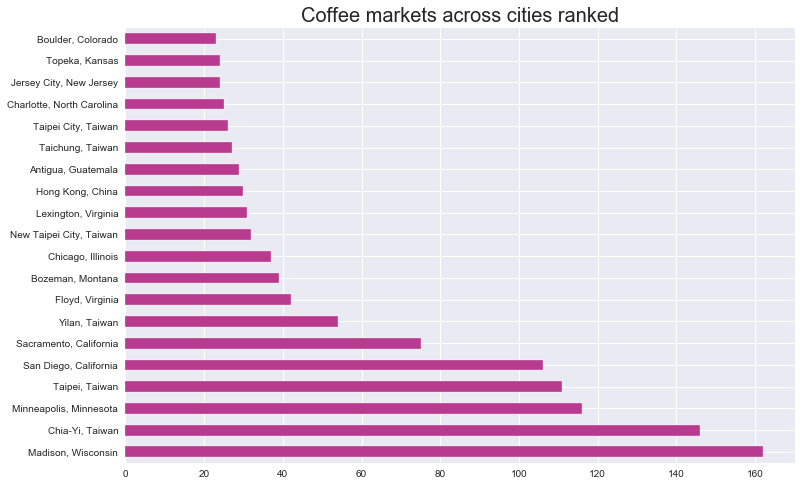

In [18]:
plt.figure(figsize = (12, 8))
df['location'].value_counts().head(20).plot(kind = 'barh', color = '#B93B8F')
plt.title('Coffee markets across cities ranked', fontdict = {'size':20})

Text(0.5, 1.0, 'Coffee Origin around the Globe')

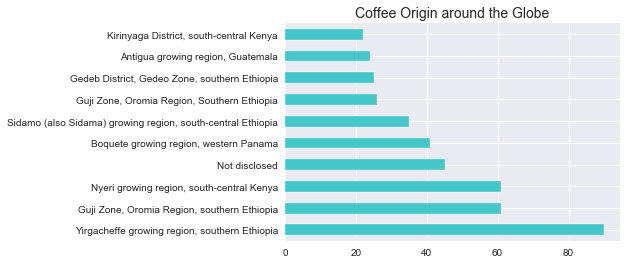

In [19]:
df['origin'].value_counts().head(10).plot(kind = 'barh', color = '#46C7C7')
plt.title('Coffee Origin around the Globe', fontdict = {'size':14})

Text(0.5, 1.0, 'Coffee Roast Popularity')

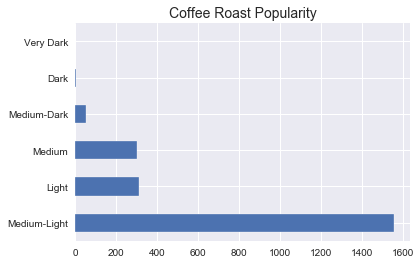

In [20]:
df['roast'].value_counts().plot(kind = 'barh')
plt.title('Coffee Roast Popularity', fontdict = {'size':14})

Text(0.5, 1.0, 'Est Price of Coffee in the immediate market')

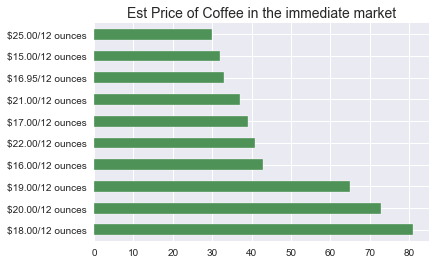

In [21]:
df['est_price'].value_counts().head(10).plot(kind = 'barh', color = '#4E9258')
plt.title('Est Price of Coffee in the immediate market', fontdict = {'size':14})

In [22]:
df.head(2)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/sweety-esp...,\n\n\n95\n\n\nA.R.C.\n“Sweety” Espresso Blend...,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,https://www.coffeereview.com/review/flora-blen...,\n\n\n94\n\n\nA.R.C.\nFlora Blend Espresso\n\...,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."


### Data Cleaning and Manipulation

In [23]:
df.isnull().sum()

slug              0
all_text          0
rating            0
roaster           0
name              0
location          1
origin            0
roast            53
est_price         5
review_date       0
agtron            0
aroma            27
acid            335
body              3
flavor            3
aftertaste        3
with_milk      1926
desc_1            0
desc_2            0
desc_3            2
dtype: int64

In [24]:
# Drop unnecessary columns
df.drop(columns = ['slug', 'all_text'], inplace = True)
df.head(2)

,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,NaN,9.0,9.0,9.0,9.0,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."


In [25]:
# Fill, Drop and Replace Nan vals
df['with_milk'].fillna(np.mean(df['with_milk']), inplace = True)
df['acid'].fillna(np.mean(df['acid']), inplace = True)
df['aroma'].fillna(np.mean(df['aroma']), inplace = True)


In [26]:
si = SimpleImputer(strategy='most_frequent')

df['roast'] = si.fit_transform(df[['roast']])

In [27]:
df.isnull().sum()

rating         0
roaster        0
name           0
location       1
origin         0
roast          0
est_price      5
review_date    0
agtron         0
aroma          0
acid           0
body           3
flavor         3
aftertaste     3
with_milk      0
desc_1         0
desc_2         0
desc_3         2
dtype: int64

In [28]:
df.dropna(axis = 'index', how = 'any', inplace = True)
df.shape

(2271, 18)

## Content Based Recommendation

In [29]:
df.head(3)

,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,95,A.R.C.,“Sweety” Espresso Blend,"Hong Kong, China",Panama; Ethiopia,Medium-Light,HKD $250/227 grams,November 2017,50/73,9.0,8.484848,9.0,9.0,9.0,9.00000,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,94,A.R.C.,Flora Blend Espresso,"Hong Kong, China",Africa; Asia Pacific,Medium-Light,HKD $158/227 grams,November 2017,54/77,9.0,8.484848,9.0,9.0,8.0,9.00000,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,92,Revel Coffee,Ethiopia Shakiso Mormora,"Billings, Montana","Guji Zone, southern Ethiopia",Medium-Light,$16.00/12 ounces,November 2017,54/70,9.0,8.000000,8.0,9.0,8.0,8.83427,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."


In [30]:
tf_vect = TfidfVectorizer(min_df=3, max_features=None, ngram_range=(1,3), 
                          stop_words='english', strip_accents='unicode')

df['desc_1'] = df['desc_1'].fillna('')

desc_matrix = tf_vect.fit_transform(df['desc_1'])

In [31]:
desc_matrix

<2271x7599 sparse matrix of type '<class 'numpy.float64'>'
	with 154362 stored elements in Compressed Sparse Row format>

In [32]:
sig = sigmoid_kernel(desc_matrix, desc_matrix)
sig

array([[0.76164942, 0.76159769, 0.7615951 , ..., 0.76159934, 0.76159562,
        0.76159774],
       [0.76159769, 0.76164942, 0.76159565, ..., 0.76159474, 0.76159942,
        0.76160138],
       [0.7615951 , 0.76159565, 0.76164942, ..., 0.7615963 , 0.76159492,
        0.76159479],
       ...,
       [0.76159934, 0.76159474, 0.7615963 , ..., 0.76164942, 0.76159536,
        0.76159476],
       [0.76159562, 0.76159942, 0.76159492, ..., 0.76159536, 0.76164942,
        0.76159841],
       [0.76159774, 0.76160138, 0.76159479, ..., 0.76159476, 0.76159841,
        0.76164942]])

In [33]:
new_index = range(0, df.shape[0])
indices = pd.Series(new_index, df['name']).drop_duplicates()
indices

name
“Sweety” Espresso Blend          0
Flora Blend Espresso             1
Ethiopia Shakiso Mormora         2
Ethiopia Suke Quto               3
Ethiopia Gedeb Halo Beriti       4
                              ... 
Finca Patzibir                2266
Proyecto Aurora               2267
Finca El Potrero              2268
Chacayá Santiago Atitlán      2269
Espresso No. 3                2270
Length: 2271, dtype: int64

In [34]:
indices['Tinamit Tolimán']

2265

In [35]:
sorted(list(enumerate(sig[indices['Tinamit Tolimán']])))[:10]

[(0, 0.761596421163522),
 (1, 0.7615962188417629),
 (2, 0.7615954152007243),
 (3, 0.7615947584765955),
 (4, 0.7615968624645911),
 (5, 0.7615964898749706),
 (6, 0.761597021237659),
 (7, 0.7615952746726528),
 (8, 0.761594936805618),
 (9, 0.7615957887514399)]

### Manual Testing

In [36]:
def run_experiment(title, sig=sig):
    idx = indices[title]
    
    coffee_list = list(enumerate(sig[idx]))
    
    coffee_sort = sorted(coffee_list, key = lambda x: x[1], reverse = True)
    
    top_ten_recmm = coffee_sort[0:10]
    
    coffee_recommender = [x[0] for x in top_ten_recmm]
    
    return df[['name', 'rating', 'location', 'est_price']].iloc[coffee_recommender].sort_values(by = ["rating"], ascending = False)

In [37]:
run_experiment(input('Enter Coffee name: '))

Enter Coffee name:  SOB Espresso


,name,rating,location,est_price
251,Costa Rica Perla Negra,95,"Durango, Colorado",$16.95/12 ounces
581,SOB Espresso,94,"Silver Lake, Minnesota",$18.95/12 ounces
1813,Rainy Day Espresso Blend,94,"Taoyuan City, Taiwan",NT $350/230 grams
2281,Espresso No. 3,94,"Antigua, Guatemala",$20.00/12 ounces
2162,Espresso Nuevo,93,"Minneapolis, Minnesota",$19.00/12 ounces
1885,Twisted V.7 Espresso,93,"Madison, Wisconsin",$17.00/12 ounces
670,Estate Grade House Blend Espresso,93,"Taoyuan, Taiwan",NT $300/8 ounces
1696,Nutty Espresso Blend,92,"Shanghai, China",¥78/16 ounces
909,Peru Elvis Rafael Single-Origin Espresso,92,"Sacramento, California",$19.00/12 ounces
945,Sweet Diary Espresso,91,"Kaohsiung, Taiwan",NT $350/227 grams
